In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Project for Car Price Prediction using

# 1. Problem Definition >>Predicting Car Price

# 2. Data Gathering

In [ ]:
# We have data in Comma Seperated value (CSV) format

In [ ]:
# import data
# use only 3 columns

In [76]:
df=pd.read_csv('OLX_cars_dataset.csv',usecols=['KM\'s driven','Year','Price'])
df

<IPython.core.display.Javascript object>

,Year,KM's driven,Price
0,2022,8500,4200000
1,2022,2200,4100000
2,2021,17000,3950000
3,2022,15000,3785000
4,2022,27000,4075000
...,...,...,...
8716,2020,54000,4500000
8717,2021,18500,4050000
8718,2022,12000,4700000
8719,2020,55000,3900000


In [79]:
## save dataframe into csv format

In [80]:
carprice_dist_year=df.to_csv('carprice_dist_year.csv')
carprice_dist_year

### Find duplicates in dataset

In [140]:
df.duplicated().sum()

# 501 rows are repeated , need to be removed

501

In [141]:
df=df.drop_duplicates()
df.shape

(8220, 3)

### Find Missing Values in Data

In [142]:
df.isnull().sum()

Year           0
KM's driven    0
Price          0
dtype: int64

### Check datatype of columns 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8220 entries, 0 to 8720
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Year         8220 non-null   int64
 1   KM's driven  8220 non-null   int64
 2   Price        8220 non-null   int64
dtypes: int64(3)
memory usage: 256.9 KB


In [ ]:
# take 5 point summary of data

In [18]:
df.describe()

,Year,KM's driven,Price
count,8220.000000,8220.000000,8.220000e+03
mean,2012.680535,95632.939173,2.102879e+06
std,5.912398,61988.979357,1.156172e+06
min,1989.000000,1.000000,1.850000e+05
25%,2008.000000,52000.000000,1.150000e+06
50%,2013.000000,90000.000000,1.900000e+06
75%,2018.000000,125000.000000,2.830000e+06
max,2024.000000,533528.000000,5.000000e+06


<AxesSubplot:>

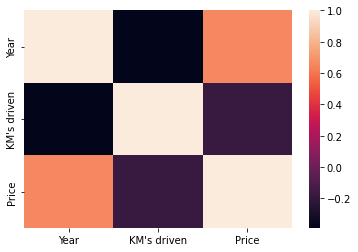

In [27]:
sns.heatmap(df.corr())
# 

# 3. EXPLORATORY DATA ANALYSIS

## Univariate Analysis

In [3]:
# sns.histplot(df['Year'])

27

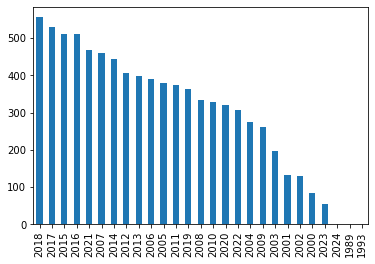

In [146]:
df['Year'].value_counts().plot(kind='bar')
df['Year'].nunique()
# We have Data of cars from last 27 years

In [20]:
# Univariate Analysis of KMs driven

C:\Users\welcome\Downloads\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel="KM's driven", ylabel='Density'>

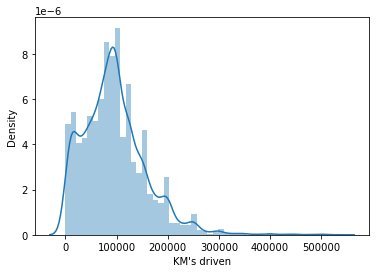

In [32]:
sns.distplot(df['KM\'s driven'])

C:\Users\welcome\Downloads\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel="KM's driven">

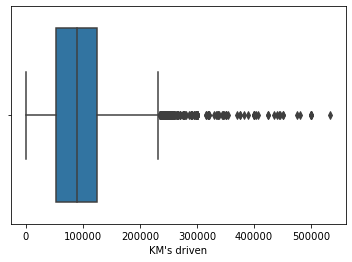

In [22]:
sns.boxplot(df['KM\'s driven'])

In [ ]:
# Univariate analysis of Car price

C:\Users\welcome\Downloads\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

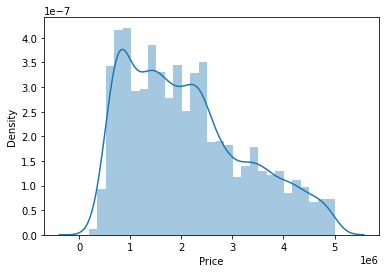

In [34]:
sns.distplot(df['Price'])

C:\Users\welcome\Downloads\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

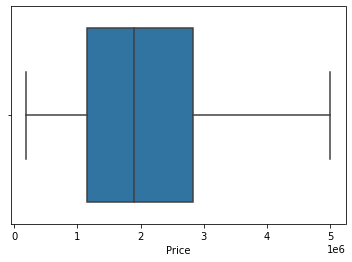

In [24]:
sns.boxplot(df['Price'])

# Bivariate Analysis

In [ ]:
# relation between 2 variables

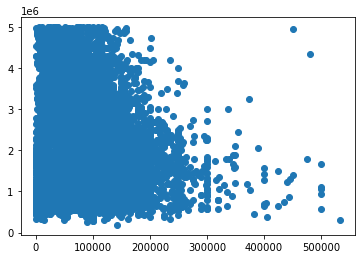

In [35]:
plt.scatter(df['KM\'s driven'],df['Price'])

# from below it seems that price of car is decreases as distance travelled by car increases.

<IPython.core.display.Javascript object>

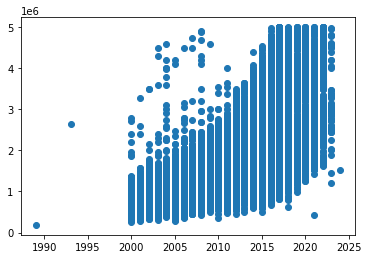

In [4]:
plt.scatter(df['Year'],df['Price'])

# From below figure , we can say that latest cars are expensive than old ones.

# 4. Feature Engineering

## 4.1 Outlier removal

In [46]:
Q1=df['KM\'s driven'].quantile(.25)
Q3=df['KM\'s driven'].quantile(.75)
print(Q1)
print(Q3)

52000.0
125000.0


In [43]:
IQR=Q3-Q1
IQR

73000.0

In [45]:
Higher_fence=Q3+ 1.5*IQR
print(Higher_fence)
Lower_fence=Q1-1.5*IQR
print(Lower_fence)

234500.0
-57500.0


In [50]:
df[df['KM\'s driven']>Higher_fence]

# There are 244 outliers 

,Year,KM's driven,Price
286,2003,241000,550000
297,2010,250956,1000000
309,2002,267000,550000
347,2004,234567,510000
366,2006,343554,900000
...,...,...,...
8269,2004,250000,1400000
8281,2004,295000,1625000
8293,2009,476000,1780000
8294,2011,295000,2360000


In [147]:
import pandas as pd
import numpy as np

def handle_outliers(df, columns):
    for column in columns:
        # Calculate the first and third quartiles (Q1 and Q3)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        
        # Calculate the IQR (Interquartile Range)
        IQR = Q3 - Q1
        
        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Replace outliers with lower and upper fence values
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    
    return df


print("Original DataFrame:")
print(df)

columns_to_handle_outliers = ['KM\'s driven']
df = handle_outliers(df, columns_to_handle_outliers)




Original DataFrame:
      Year  KM's driven    Price
0     2022         8500  4200000
1     2022         2200  4100000
2     2021        17000  3950000
3     2022        15000  3785000
4     2022        27000  4075000
...    ...          ...      ...
8716  2020        54000  4500000
8717  2021        18500  4050000
8718  2022        12000  4700000
8719  2020        55000  3900000
8720  2021        31000  4345000

[8220 rows x 3 columns]


C:\Users\welcome\AppData\Local\Temp\ipykernel_8364\674594492.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
C:\Users\welcome\AppData\Local\Temp\ipykernel_8364\674594492.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])


In [148]:
print("\nDataFrame after handling outliers:")
print(df)



DataFrame after handling outliers:
      Year  KM's driven    Price
0     2022       8500.0  4200000
1     2022       2200.0  4100000
2     2021      17000.0  3950000
3     2022      15000.0  3785000
4     2022      27000.0  4075000
...    ...          ...      ...
8716  2020      54000.0  4500000
8717  2021      18500.0  4050000
8718  2022      12000.0  4700000
8719  2020      55000.0  3900000
8720  2021      31000.0  4345000

[8220 rows x 3 columns]


In [149]:
df.describe()

,Year,KM's driven,Price
count,8220.000000,8220.000000,8.220000e+03
mean,2012.680535,94084.096959,2.102879e+06
std,5.912398,56672.628440,1.156172e+06
min,1989.000000,1.000000,1.850000e+05
25%,2008.000000,52000.000000,1.150000e+06
50%,2013.000000,90000.000000,1.900000e+06
75%,2018.000000,125000.000000,2.830000e+06
max,2024.000000,234500.000000,5.000000e+06


C:\Users\welcome\Downloads\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel="KM's driven">

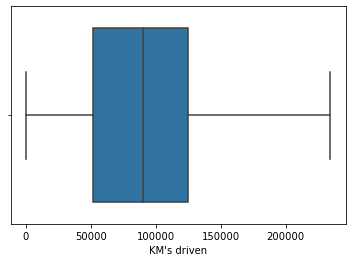

In [65]:
sns.boxplot(df['KM\'s driven'])

## 4.2 SCALING OF FEAUTURES

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [7]:
cols_to_scale = ['Year','KM\'s driven']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
df

,Year,KM's driven,Price
0,0.942857,0.015930,4200000
1,0.942857,0.004122,4100000
2,0.914286,0.031862,3950000
3,0.942857,0.028113,3785000
4,0.942857,0.050605,4075000
...,...,...,...
8716,0.885714,0.101211,4500000
8717,0.914286,0.034673,4050000
8718,0.942857,0.022490,4700000
8719,0.885714,0.103086,3900000


# 5 Feature Selection

In [8]:
x=df.drop('Price',axis=1)
y=df['Price']
x

,Year,KM's driven
0,0.942857,0.015930
1,0.942857,0.004122
2,0.914286,0.031862
3,0.942857,0.028113
4,0.942857,0.050605
...,...,...
8716,0.885714,0.101211
8717,0.914286,0.034673
8718,0.942857,0.022490
8719,0.885714,0.103086


In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.8,random_state=50)

In [10]:
x_train

,Year,KM's driven
5673,0.914286,0.014993
4566,0.542857,0.166813
8027,0.657143,0.189304
549,0.542857,0.187430
2680,0.885714,0.231394
...,...,...
8262,0.657143,0.224916
6214,0.828571,0.061851
8324,0.942857,0.196802
6253,0.800000,0.187430


# 6. Machine learning Model Building

## 6.1 Linear  Regression Model

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

### 6.1.1 Model Object creation

In [44]:
lr=LinearRegression()
lr

LinearRegression()

### 6.1.2 Model Learning from training data

In [45]:
linear_model=lr.fit(x_train,y_train)
linear_model

LinearRegression()

### 6.1.3 Model Prediction on test data

In [46]:
y_pred=linear_model.predict(x_test)
y_pred

array([ 775512.73540529, 2713336.86057959, 2448898.370742  , ...,
       3196975.08393302, 3155007.55937183, 2186052.41168254])

In [47]:
linear_model.coef_

array([4760625.26381341,  895632.29906224])

### 6.1.4 Model Evaluation on Predicted data

In [48]:
linear_mae=mean_absolute_error(y_test,y_pred)
linear_mse=mean_squared_error(y_test,y_pred)
linear_r2score=r2_score(y_test,y_pred)

In [49]:
print('mean absolute error',':',linear_mae)
print('mean sqaured error',':',linear_mse)
print('r2score',':',linear_r2score)

mean absolute error : 698017.877363488
mean sqaured error : 739692470006.6483
r2score : 0.45338756503342903


### 6.1.5 Model save

In [50]:
import os
pickle.dump(model, open('linear_model.pkl', 'wb'))

<IPython.core.display.Javascript object>

## 6.2 Decision Tree regression model

In [51]:
# lets use Decision Tree regressor

In [52]:
from sklearn.tree import DecisionTreeRegressor 

### 6.2.1 Model Object creation

In [53]:
dtr=DecisionTreeRegressor()
dtr

DecisionTreeRegressor()

### 6.2.2 Model Learning on train data

In [54]:
dtr_model=dtr.fit(x_train,y_train)
dtr_model

DecisionTreeRegressor()

### 6.2.3 Model Prediction on test data

In [55]:
y_pred_dtr=dtr_model.predict(x_test)
y_pred_dtr

array([2150000.        , 4350000.        , 1050000.        , ...,
       2535000.        , 3046818.18181818, 2100000.        ])

### 6.2.4 Model Evaluation 

In [56]:
dtr_mae=mean_absolute_error(y_test,y_pred_dtr)
dtr_mse=mean_squared_error(y_test,y_pred_dtr)
dtr_r2score=r2_score(y_test,y_pred_dtr)

In [57]:
print('mean absolute error',':',dtr_mae)
print('mean sqaured error',':',dtr_mse)
print('r2score',':',dtr_r2score)

mean absolute error : 733610.4951329614
mean sqaured error : 973062380151.6387
r2score : 0.2809336061183998


### 6.2.5 Model Save

In [58]:
pickle.dump(dtr_model, open('dtr_model.pkl', 'wb'))

<IPython.core.display.Javascript object>

## 6.3 Support Vector Machine Regressor

In [59]:
# lets try SVM
from sklearn.svm import SVR

### 6.3.1 Model Object Creation

In [60]:
svr=SVR()
svr

SVR()

### 6.3.2 Model learning on train data

In [61]:
svr_model=svr.fit(x_train,y_train)
svr_model

SVR()

### 6.3.3 Model prediction on test data

In [62]:
y_pred_svr=svr_model.predict(x_test)
y_pred_svr

array([1899390.00474098, 1901201.60204047, 1901126.40574767, ...,
       1901571.3284433 , 1901573.6034734 , 1900613.41119693])

### 6.3.4 Model Evaluation 

In [63]:
svr_mae=mean_absolute_error(y_test,y_pred_svr)
svr_mse=mean_squared_error(y_test,y_pred_svr)
svr_r2score=r2_score(y_test,y_pred_svr)

In [64]:
print('mean absolute error',':',svr_mae)
print('mean sqaured error',':',svr_mse)
print('r2score',':',svr_r2score)

mean absolute error : 943854.5761989957
mean sqaured error : 1390080492975.5193
r2score : -0.027231334473434066


### 6.3.5 Model saving 

In [65]:
pickle.dump(svr_model, open('svr_model.pkl', 'wb'))

<IPython.core.display.Javascript object>

# 7. Conclusion 

In [71]:

carprice_dist_year


NameError: name 'path_or_buf' is not defined